# STEP 1: COLLECT DATA

***Ask***

How do annual members and casual riders use cyclistic bikes differently?

The data has been made available by Motivate International Inc. under [this](http://www.divvybikes.com/data-license-agreement) license.

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown
to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across
Chicago. The bikes can be unlocked from one station and returned to any other station in the
system anytime.

Cyclistic’s marketing team wants to understand how casual riders and annual members use the bike-share service differently.
The goal is to uncover behavioral patterns in ride frequency, duration, and usage by day of the week, so the company can design targeted strategies to increase long-term revenue and user retention. We are comparing casual riders to annual members and their usage of cyclistic bikes to design a new marketing strategy to convert casual riders to annual members. (filling in that gap with marketing for conversion). 

Key Stakeholders:

Cyclistic Shareholders
Cyclistic Bike-Share Company
    Cyclistic Marketing Analytics Team
    Cyclistic Executive Team
Lily Moreno: Director of Marketing

    






In [1]:
#install packages for analysis 
install.packages(c("tidyverse", "conflicted", "ggplot2","lubridate","janitor"))

library(tidyverse)  #helps wrangle data
# Use the conflicted package to manage conflicts
library(conflicted)
library(lubridate)
library(janitor)

# Set dplyr::filter and dplyr::lag as the default choices
conflict_prefer("filter", "dplyr")
conflict_prefer("lag", "dplyr")

# # Upload Divvy datasets (csv files) here
q1_2019 <- read_csv("/kaggle/input/divvy-dataset/Divvy_Trips_2019_Q1.csv")
q1_2020 <- read_csv("/kaggle/input/divvy-dataset/Divvy_Trips_2020_Q1.csv")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::lag over any other package.
Rows: 365069 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): start_time, end_time, from_station_name, to_station_name, usertype,...
dbl (5): trip_id, bikeid, from_station_id, to_station_id, birthyear


***Prepare***

Divvy_Trips_2019_Q1 & Divvy_Trips_2020_Q1 data is originally located in Google Sheets. The data is to be cleaned and exported for use and analysis in RStudio.  

The data being leveraged is made available by Motivate International Inc under [this](http://www.divvybikes.com/data-license-agreement) license

The data is originally organized as 1 sheet for each Link provided to us in the "Case study: How does a bike Share navigate speedy success" PDF. The data contents of the 2019 sheet are 365,070 rows, while the data contents of the 2020 sheet are over 426,888 rows. This data is being drawn from the Cyclistic company, referencing the City of Chicago, and is limited to Q1 data only. 

* 2019 data is organized using the following columns: trip_id, start_time, end_time, bikeid, tripduration, from_station_id, from_station_name, to_station_id, to_station_name, usertype, gender, birthyear.
1. The 2019 dataset does not have a ride type, ride_id, start_lat, start_lng, end_lat, end_lng, and member_casual

   

* 2020 data is organized using the following columns: ride_id	, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual.
1. The 2020 dataset does not have trip_id, bike_id, trip duration, usertype, gender, or birthyear



There seem to be certain biases and credibility issues before beginning the analysis or cleaning steps of this case study. Cyclistic is a single company looking to see the city of Chicago's casual vs member bike riding population and tendencies. This data set is being drawn in Q1, which hosts one of the coldest months of the year, so individuals will not be as inclined to be riding bikes in the same capacity as Q2 or Q3. The data being analyzed is from 2019 - 2020, which is when COVID-19 was at its peak infection and mortality rates, which affected the use and availability of bike riding and bike sharing systems. 

The data itself is ROCCC. There is no personal  or implicitly stated bias in the dataset. The data is organized with interconnected fields organized into columns for accurate data analysis. The data is Reliable, clear, and correct  from a Trusted Source (Motivate International under [this](http://www.divvybikes.com/data-license-agreement) license.)
       The data is not complete, however. 
* Blanks within the dataset occur in the Gender column, where 19,710 records are left blank.
* Blanks within the dataset occur in the birth year column, totalling 17,986 records.
* There are incomplete data values within the gender and birth year columns in the 2019 dataset.
* There seem to be misaligned column names and details in both sheets, which provide a challenge for joining and comparing the data.


Data-privacy issues prohibit you from using riders’ personally identifiable information. This means that you won’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes. The data is anonymized by not providing personal identifiable information about the riders. There are no first names, last names, emails, or PII that are related to specific individuals. This data set and findings is made available for all to view and edit upon their discretion.

The data has been checked for integrity by being processed for a cleanup and verification. I conducted a cleanup of the data from Google Sheets where I checked for unique values, duplicates, and blank values within the dataset.  I ran a check to note if the data in both sheets is consistent in terms of format and consistency of integers. Data cleaning was conducted to ensure the data within the rows was consistent in terms of text as well as data type. (The data being leveraged is made available by Motivate International Inc under [this](http://www.divvybikes.com/data-license-agreement) license) The data was validated for authenticity to ensure there are no gaps or misleading values, indicators, or columns. By verifying the data's integrity, we can ensure we are using a complete, authentic, and verifiable data source. This ensures a complete and detailed analysis of cyclistic patterns to draw sound and thorough conclusions for how annual members and casual riders differ. 













# STEP 2: WRANGLE DATA AND COMBINE INTO A SINGLE FILE

In [2]:
# Compare column names each of the files
# While the names don't have to be in the same order, they DO need to match perfectly before we can use a command to join them into one file
colnames(q1_2019)
colnames(q1_2020)

# Rename columns  to make them consistent with q1_2020 (as this will be the supposed going-forward table design for Divvy)

(q1_2019 <- rename(q1_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid
                   ,started_at = start_time
                   ,ended_at = end_time
                   ,start_station_name = from_station_name
                   ,start_station_id = from_station_id
                   ,end_station_name = to_station_name
                   ,end_station_id = to_station_id
                   ,member_casual = usertype
                   ))

# Inspect the dataframes and look for incongruencies
str(q1_2019)
str(q1_2020)

# Convert ride_id and rideable_type to character so that they can stack correctly
q1_2019 <-  mutate(q1_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 

# Stack individual quarter's data frames into one big data frame
all_trips <- bind_rows(q1_2019, q1_2020)

# Remove lat, long, birthyear, and gender fields as this data was dropped beginning in 2020
all_trips <- all_trips %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng, birthyear, gender,  "tripduration"))

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989
21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990
21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994
21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993
21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994
21742448,2019-01-01 0:15:33,2019-01-01 0:19:09,2437,216,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983
21742449,2019-01-01 0:16:06,2019-01-01 0:19:03,2708,177,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984
21742450,2019-01-01 0:18:41,2019-01-01 0:20:21,2796,100,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990
21742451,2019-01-01 0:18:43,2019-01-01 0:47:30,6205,1727,150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995


spc_tbl_ [365,069 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : num [1:365069] 21742443 21742444 21742445 21742446 21742447 ...
 $ started_at        : chr [1:365069] "2019-01-01 0:04:37" "2019-01-01 0:08:13" "2019-01-01 0:13:23" "2019-01-01 0:13:45" ...
 $ ended_at          : chr [1:365069] "2019-01-01 0:11:07" "2019-01-01 0:15:34" "2019-01-01 0:27:12" "2019-01-01 0:43:28" ...
 $ rideable_type     : num [1:365069] 2167 4386 1524 252 1170 ...
 $ tripduration      : num [1:365069] 390 441 829 1783 364 ...
 $ start_station_id  : num [1:365069] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:365069] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:365069] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:365069] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member

# STEP 3: CLEAN UP AND ADD DATA TO PREPARE FOR ANALYSIS


***Process***

The tools being used in this case study are Google Sheets, RStudio, and Kaggle for ease of use, continuity, and to upload my notebook for public consumption. Choosing other data besides the 2019 and 2020 Divvy_Trips_Q1 data might lead to errors because the data exceeds the memory available in the free plan of Rstudio and exponentially slows down the capability and availability of Google Sheets. 

I have ensured the data's integrity by cleaning the data from Google Sheets, where I checked for unique values, duplicates, and blank values within the dataset.  I ran a check to note if the data in both sheets is consistent in terms of format and consistency of integers. Data cleaning was conducted to ensure the data within the rows was consistent in terms of text as well as data type. The data was validated for authenticity to me from a trusted source in Motivate International Inc. under this license. The data has been checked with ROCCC to ensure there are no gaps in integrity in the data, as well as ensuring holes and credibility issues have been addressed. 

The data has been verified to ROCCC techniques and is ready to be analyzed by completing the following steps:
* Making a copy of the raw data and moving it into a separate folder for ease of access and analysis.
* Removing duplicate rows if available
* Removing whitespaces
* Trimming the data
* Making sure the data is in consistent text and data type formats
* Ensuring that column names are consistent
* Filling in gaps of missing data per spreadsheet
* exporting as a CSV file for RStudio use

Any change made to the original dataset has been done so in a copy of the data. The changes made to the copy of the data have been noted while keeping the original dataset intact. 





In [3]:
# Inspect the new table that has been created
colnames(all_trips)  #List of column names
nrow(all_trips)  #How many rows are in data frame?
dim(all_trips)  #Dimensions of the data frame?
head(all_trips)  #See the first 6 rows of data frame.  Also tail(all_trips)
str(all_trips)  #See list of columns and data types (numeric, character, etc)
summary(all_trips)  #Statistical summary of data. Mainly for numerics

# In the "member_casual" column, replace "Subscriber" with "member" and "Customer" with "casual"
# Before 2020, Divvy used different labels for these two types of riders ... we will want to make our dataframe consistent with their current nomenclature
# N.B.: "Level" is a special property of a column that is retained even if a subset does not contain any values from a specific level
# Begin by seeing how many observations fall under each usertype
table(all_trips$member_casual)

# Reassign to the desired values (we will go with the current 2020 labels)
all_trips <-  all_trips %>% 
  mutate(member_casual = recode(member_casual
                                ,"Subscriber" = "member"
                                ,"Customer" = "casual"))

# Check to make sure the proper number of observations were reassigned
table(all_trips$member_casual)

[1] "ride_id"            "started_at"         "ended_at"          
[4] "rideable_type"      "start_station_id"   "start_station_name"
[7] "end_station_id"     "end_station_name"   "member_casual"

[1] 791956

[1] 791956      9

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber
21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber
21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber
21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber
21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber
21742448,2019-01-01 0:15:33,2019-01-01 0:19:09,2437,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber


tibble [791,956 × 9] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:791956] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at        : chr [1:791956] "2019-01-01 0:04:37" "2019-01-01 0:08:13" "2019-01-01 0:13:23" "2019-01-01 0:13:45" ...
 $ ended_at          : chr [1:791956] "2019-01-01 0:11:07" "2019-01-01 0:15:34" "2019-01-01 0:27:12" "2019-01-01 0:43:28" ...
 $ rideable_type     : chr [1:791956] "2167" "4386" "1524" "252" ...
 $ start_station_id  : num [1:791956] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:791956] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:791956] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:791956] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:791956] "Subscriber" "Subscriber" "Subscriber" "Subscri

   ride_id           started_at          ended_at         rideable_type     
 Length:791956      Length:791956      Length:791956      Length:791956     
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_id start_station_name end_station_id  end_station_name  
 Min.   :  2.0    Length:791956      Min.   :  2.0   Length:791956     
 1st Qu.: 77.0    Class :character   1st Qu.: 77.0   Class :character  
 Median :174.0    Mode  :character   Median :174.0   Mode  :character  
 Mean   :204.4                       Mean   :204.4                     
 3rd Qu.:291.0          


    casual   Customer     member Subscriber 
     48480      23163     378407     341906 


casual member 
 71643 720313 

In [4]:
# Add columns that list the date, month, day, and year of each ride
# This will allow us to aggregate ride data for each month, day, or year ... before completing these operations we could only aggregate at the ride level

all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

# Add a "ride_length" calculation to all_trips (in seconds)

all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at, units = "secs")

# Inspect the structure of the columns
str(all_trips)

tibble [791,956 × 15] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:791956] "21742443" "21742444" "21742445" "21742446" ...
 $ started_at        : chr [1:791956] "2019-01-01 0:04:37" "2019-01-01 0:08:13" "2019-01-01 0:13:23" "2019-01-01 0:13:45" ...
 $ ended_at          : chr [1:791956] "2019-01-01 0:11:07" "2019-01-01 0:15:34" "2019-01-01 0:27:12" "2019-01-01 0:43:28" ...
 $ rideable_type     : chr [1:791956] "2167" "4386" "1524" "252" ...
 $ start_station_id  : num [1:791956] 199 44 15 123 173 98 98 211 150 268 ...
 $ start_station_name: chr [1:791956] "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ end_station_id    : num [1:791956] 84 624 644 176 35 49 49 142 148 141 ...
 $ end_station_name  : chr [1:791956] "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ member_casual     : chr [1:791956] "member" "member" "member" "member" ...
 $ dat

In [5]:
# Convert "ride_length" from Factor to numeric so we can run calculations on the data
is.factor(all_trips$ride_length)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))
is.numeric(all_trips$ride_length)

# Remove "bad" data
# The dataframe includes a few hundred entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative
# We will create a new version of the dataframe (v2) since data is being removed

all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]

[1] FALSE

[1] TRUE

# STEP 4: CONDUCT DESCRIPTIVE ANALYSIS

***Analyze***

Data organization begins at the package installation level with the installation of packages. For this case study, we installed and loaded tidyverse, lubridate, janitor, ggplot2, and conflicted. 

Data should be organized in a consistent format. Column names must follow a concise format for ease of use. Values within columns are formatted to be bound and comparable for analysis. Be sure to create unique identifiers for columns so that data is distinct and usable for analysis
 
Data is to be organized in a descriptive manner that is numeric, character, or time format, given this case study. All values within their given format should be consistent for proper analysis and use in deeper analysis. 

Missing values or unknown values are to be excluded and discarded from the new data table. When manipulating data, forming copies to keep raw data intact is crucial. If you are removing data and manipulating columns for analysis, make a copy so the original data set remains usable. 

**Data formatting:**

Data from the Divvy_Trips_2019_Q1 sheet has been renamed to be in line with the Divvy_trips_2020_Q1 sheet data. 

Ride_id and rideable type have been mutated to match the character data value

Columns start_lat, start_lng, end_lat, end_lng, birthyear, gender,  "tripduration" have been removed.

“Subscriber “ and “Customer” member types have been recoded to match the “member” and “casual” data type values within the member_casual column

A list of date, month, day, and year of each ride has been aggregated

Ride_length has been calculated, converted into seconds, and converted to numeric so we can run calculations. 

Bad data, unknown values, and null values have been removed from the original dataset. A new V2 data set was cleaned and formed, which excluded the bad data. 

**Data Surprises and Discoveries:**

There were a total of 720313 members as opposed to 71643 Casual riders. Making for a smaller conversion possibility as most people in this study are listed as members 

The data set sourced is from the first 3 months of the year in 2019 and 2020, referring to Q1. 

The minimum ride length was listed as 1 second.

The mean ride length for casual members is 4,577.5316 seconds longer. The length of ride for casual riders was 5372.7839, and the mean ride length for members is 795.2523 seconds

Max ride length for casual members indicates 10632022 seconds long, while the max ride length for members indicates 6096428 seconds. This is a surprising discovery of a delta revealing 4,535,594 seconds between the max ride length of casual riders vs members. 

Casual members are riding their bikes 7.6 x more in length on Fridays. Casual riders have a ride length of 6090.7373 seconds while members have a mean ride length of 796.7338 seconds. 

The biggest gap between members and casual riders is on Thursday. Casual riders have a ride length mean of 8451.6669 seconds while members hold a ride length mean of 707.2093 seconds. Casual riders are riding their bike 11.95 x more time in seconds on average than members do on Thursdays. 

Casual riders have a total of 18,652 rides as opposed to members who have 60,197 rides on Sunday, which is a gap of 41,545 rides. Despite the gap in the number of rides, members have an average duration of their rides to be 972.9383 seconds, as opposed to casual riders, whose average duration of ride is totalled at 5061.3044 seconds. 

**Trends:**

* A vast majority of riders within Q1 are already members, with only a small percentage of riders being casuals. 
* Members seem to have smaller trips in terms of duration as opposed to casuals
* Casuals seem to be taking exponentially more trips than members during the same times of the day across the week. 
* In terms of the longest duration of rides, casuals are riding their bikes for a longer period of time compared to members.

These insights give more detail to the data that is being provided. Although we only have Q1 data for a certain bike-share company in Chicago, we can conclude with certainty that casual riders take fewer trips for a longer duration and that members take shorter trips more frequently. 
These insights help us market to casuals on how a membership can help improve their riding experience. They help us understand what casuals are doing that is different from what members are doing. If you want to convert casuals to members, you should get them to do the same things in terms of their activity on the bikes throughout the week. Since there are exponentially more members than there are casual riders, the member lifestyle as it pertains to cyclistic bike riding will be a key point of conversion. These insights can answer docking questions, the number of bike questions, average allotted time per bike per day, and incentives surrounding why certain groups use certain bike options. 









[1] 1189.459

[1] 539

[1] 10632022

[1] 1

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       1      331      539     1189      912 10632022 

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,5372.7839
member,795.2523


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,1393
member,508


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,10632022
member,6096428


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,2
member,1


all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,6090.7373
member,Friday,796.7338
casual,Monday,4752.0504
member,Monday,822.3112
casual,Saturday,4950.7708
member,Saturday,974.0730
casual,Sunday,5061.3044
member,Sunday,972.9383
casual,Thursday,8451.6669


all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,5061.3044
member,Sunday,972.9383
casual,Monday,4752.0504
member,Monday,822.3112
casual,Tuesday,4561.8039
member,Tuesday,769.4416
casual,Wednesday,4480.3724
member,Wednesday,711.9838
casual,Thursday,8451.6669


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,18652,5061.3044
casual,Mon,5591,4752.0504
casual,Tue,7311,4561.8039
casual,Wed,7690,4480.3724
casual,Thu,7147,8451.6669
casual,Fri,8013,6090.7373
casual,Sat,13473,4950.7708
member,Sun,60197,972.9383
member,Mon,110430,822.3112


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


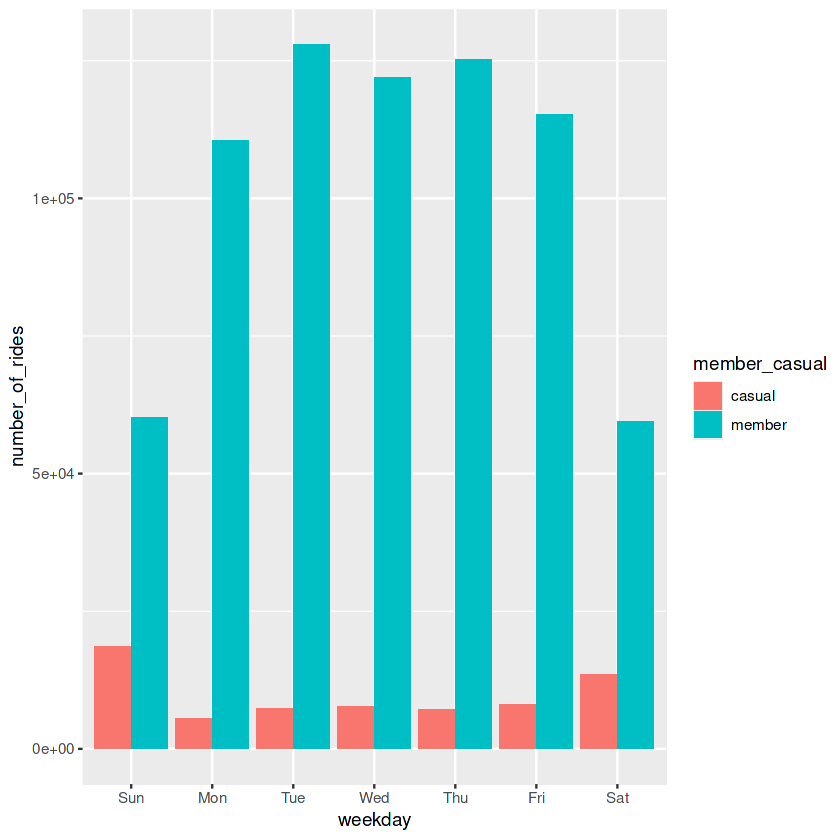

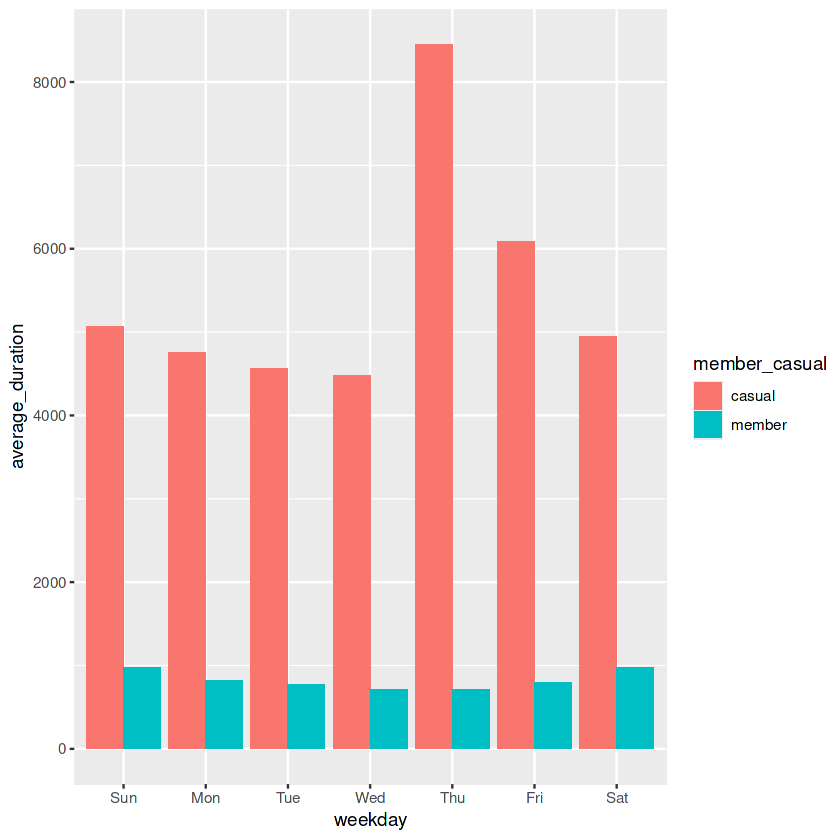

In [6]:
# Descriptive analysis on ride_length (all figures in seconds)
mean(all_trips_v2$ride_length) #straight average (total ride length / rides)
median(all_trips_v2$ride_length) #midpoint number in the ascending array of ride lengths
max(all_trips_v2$ride_length) #longest ride
min(all_trips_v2$ride_length) #shortest ride

# You can condense the four lines above to one line using summary() on the specific attribute
summary(all_trips_v2$ride_length)

# Compare members and casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

# See the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

# Notice that the days of the week are out of order. Let's fix that.
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

# Now, let's run the average ride time by each day for members vs casual users
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

# analyze ridership data by type and weekday
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(member_casual, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()							#calculates the number of rides and average duration 
            ,average_duration = mean(ride_length)) %>% 		# calculates the average duration
  arrange(member_casual, weekday)								# sorts

# Let's visualize the number of rides by rider type
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")

# Let's create a visualization for average duration
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")

In [7]:
# Top Start Stations
> all_trips_v2 %>%
+     count(start_station_name, sort = TRUE) %>%
+     top_n(10) %>%
+     ggplot(aes(x = reorder(start_station_name, n), y = n)) +
+     geom_col(fill = "steelblue") +
+     coord_flip() +
+     labs(title = "Top 10 Start Stations", x = "Station", y = "Number of Rides")

ERROR: Error in parse(text = x, srcfile = src): <text>:2:1: unexpected '>'
1: # Top Start Stations
2: >
   ^


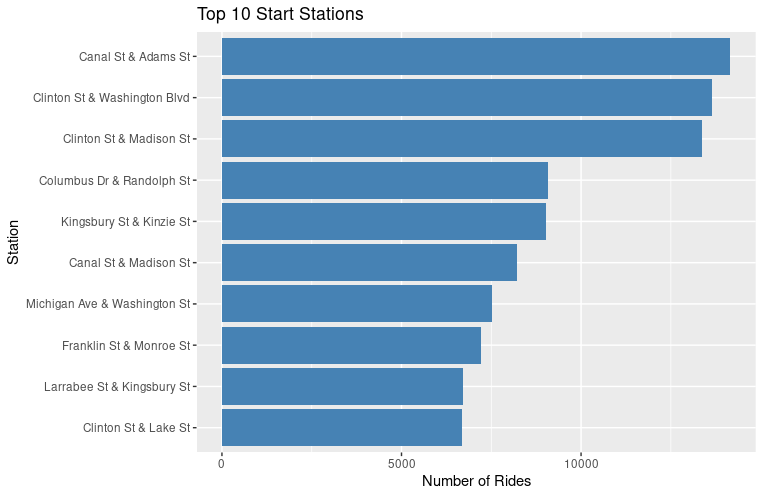

In [8]:
# Top End Stations
> all_trips_v2 %>%
+     count(end_station_name, sort = TRUE) %>%
+     top_n(10) %>%
+     ggplot(aes(x = reorder(end_station_name, n), y = n)) +
+     geom_col(fill = "darkorange") +
+     coord_flip() +
+     labs(title = "Top 10 End Stations", x = "Station", y = "Number of Rides")

ERROR: Error in parse(text = x, srcfile = src): <text>:2:1: unexpected '>'
1: # Top End Stations
2: >
   ^


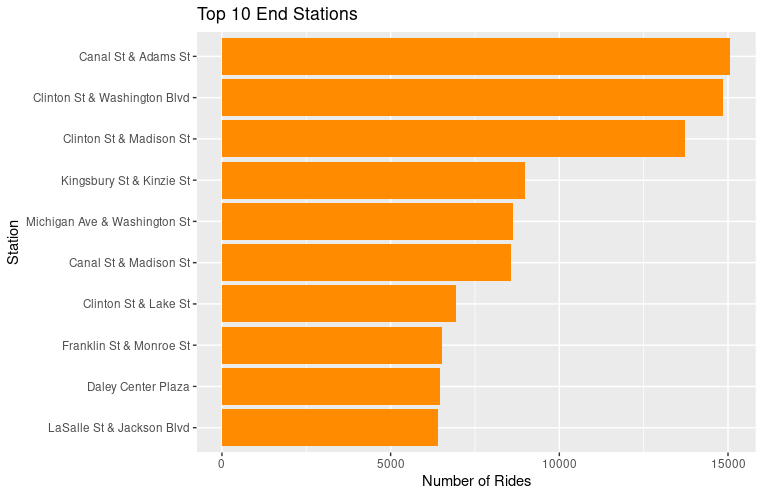

In [9]:
library(tidyverse)
> library(lubridate)
> > # Ensure weekday column exists
> all_trips_v2$day_of_week <- wday(all_trips_v2$started_at, label = TRUE)
> > # Plot average ride length by day of week and user type
> all_trips_v2 %>%
+     group_by(member_casual, day_of_week) %>%
+     summarise(avg_ride_length = mean(ride_length, na.rm = TRUE)) %>%
+     ggplot(aes(x = day_of_week, y = avg_ride_length, fill = member_casual)) +
+     geom_col(position = "dodge") +
+     labs(title = "Average Ride Length by Day of the Week",
+          x = "Day of Week",
+          y = "Average Duration (seconds)",
+          fill = "User Type") +
+     theme_minimal()

ERROR: Error in parse(text = x, srcfile = src): <text>:2:1: unexpected '>'
1: library(tidyverse)
2: >
   ^


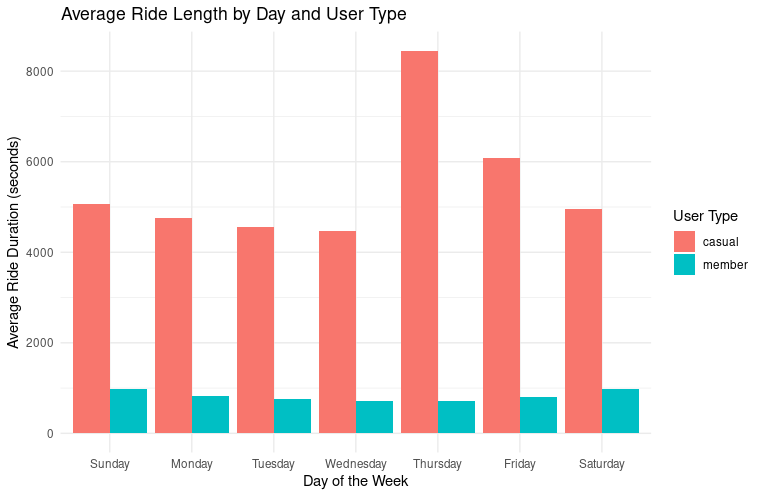

In [ ]:
library(tidyverse)
> > # Count total rides per user type and plot
> all_trips_v2 %>%
+     count(member_casual) %>%
+     ggplot(aes(x = member_casual, y = n, fill = member_casual)) +
+     geom_col() +
+     labs(title = "Total Rides by User Type",
+          x = "User Type",
+          y = "Number of Rides") +
+     theme_minimal()

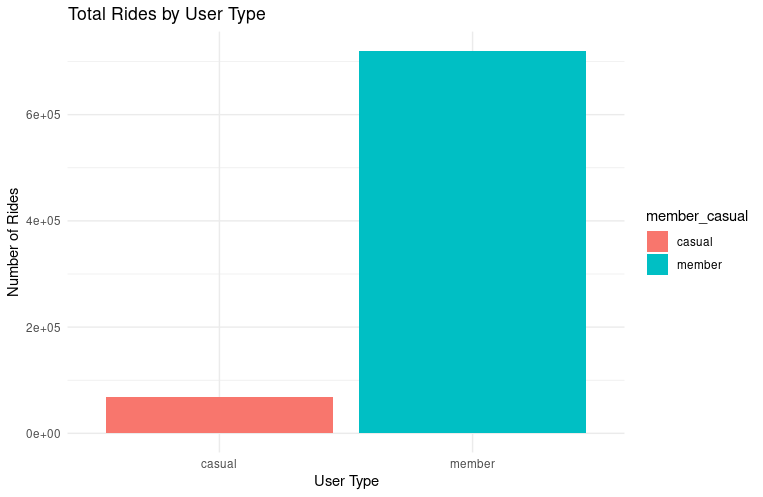

In [ ]:
library(tidyverse)
> > # Prepare data: count and calculate percentages
> rider_share <- all_trips_v2 %>%
+     count(member_casual) %>%
+     mutate(percent = round(n / sum(n) * 100, 1),
+            label = paste0(member_casual, " (", percent, "%)"))
> > # Plot pie chart
> ggplot(rider_share, aes(x = "", y = n, fill = member_casual)) +
+     geom_col(width = 1, color = "white") +
+     coord_polar(theta = "y") +
+     geom_text(aes(label = label), position = position_stack(vjust = 0.5)) +
+     labs(title = "Ride Share: Members vs Casual Riders",
+          fill = "User Type") +
+     theme_void()

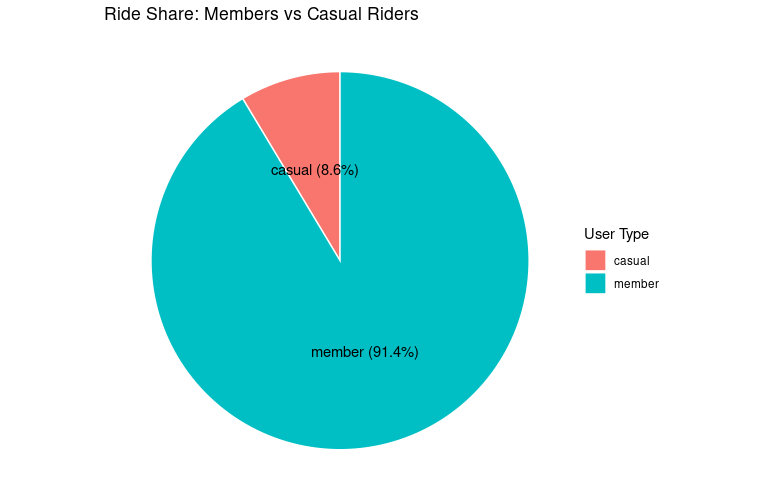

In [ ]:
# Load libraries
> library(tidyverse)
> library(lubridate)
> > # Ensure day_of_week column is present and ordered
> all_trips_v2$day_of_week <- wday(all_trips_v2$started_at, label = TRUE, abbr = FALSE)
> all_trips_v2$day_of_week <- factor(all_trips_v2$day_of_week,
+                                    levels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
> > # Grouped bar chart: Avg ride length by day and rider type
> all_trips_v2 %>%
+     group_by(member_casual, day_of_week) %>%
+     summarise(avg_ride_length = mean(ride_length, na.rm = TRUE)) %>%
+     ggplot(aes(x = day_of_week, y = avg_ride_length, fill = member_casual)) +
+     geom_col(position = "dodge") +
+     labs(
+         title = "Average Ride Length by Day and User Type",
+         x = "Day of the Week",
+         y = "Average Ride Duration (seconds)",
+         fill = "User Type"
+     ) +
+     theme_minimal()

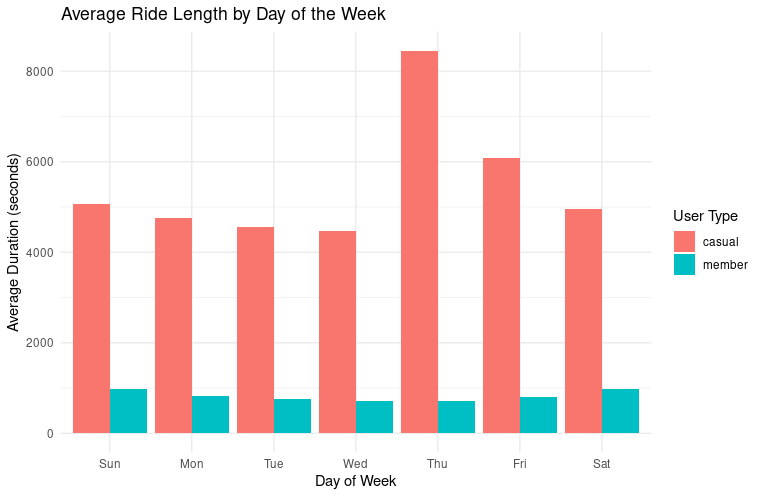

***Share***

Were you able to answer the question of how annual members and casual riders use Cyclistic bikes differently?
    Yes, casual riders use bikes less often in terms of average rides, but they ride their bikes for a longer duration of time as opposed to members who take shorter trips but more frequently. 

What story does your data tell?
    Although there are more members than casual riders by a significant margin, we can conclude that the tendencies from casual riders can be marketed to so they can convert to members. Most members take shorter trips more frequently, while casual riders take fewer trips with longer durations. Bridging the gap in use will allow for the  conversion of casual riders to annual members

How do your findings relate to your original question?
    Casual riders and member riders differ in why they use their bikes. The frequency with which they use them is skewed to members, and the duration for which they use them is skewed to casual riders. There is a vast majority of individuals who are already members, and a small fraction of riders who are listed as casuals. This could be a result of having only Q1 data for a specific company in Chicago, but it is important to note. 

Who is your audience? What is the best way to communicate with them?
    Our audience is the casual riders and those who have not yet taken a single ride. The best way to communicate to them is to have them see the intuitive and connective nature of the annual bike system that allows them to take their bikes wherever, whenever they like, instead of saving their trips for a casual day. With the annual pass ,they can take advantage of the thousands of docking stations and bikes located around the city, so they can make frequent bike rides with family and friends all around the city to their points of interest.

Can data visualization help you share your Findings?
    Data visualization allows readers to take a snapshot view of the data and make sense of it without needing to read every line of code or understand every piece of evidence. Visualizations on the casual rider vs the member rider allow us to see the similarities and differences that each poses to their respective functions. It makes complex data easy to understand while highlighting trends, patterns, and outliers within the dataset. This storytelling technique adds credibility and professionalism to technical and non-technical audiences while enhancing the bottom line of remembering the data and acting on it. 

***My presentation is available for use at the audience's leisure through Kaggle.*** 





***Act***

The conclusions we can make on the data are limiting based on the type of data we have to source from. This is a dataset from a specific city, a specific company, in the Q1 timeline. Inclimatic weather factors must be taken into consideration, especially in Chicago, as to how it affects casual and member bike riders. The data set was acquired in 2019-2020, which was the peak of COVID-19. This has impacted the data and how many individuals are willing to use casual bike rides and memberships. For the data we have available, we can conclude that there are 71,643 casual riders through 2019-2020. There are 720,313 member bike riders in 2019-2020. There are over 10x the amount of members than there are casual riders so marketing efforts must be targeted and detailed based specifically on where these individuals start and end their bike rides, and outlining the possibility of producing more bike rides as opposed to one big trip that is exponentially longer than any trip done by members. 

Our team and business can apply my insights into their business by having tailor-made marketing campaigns on specific start and end stations that appeal to more frequent bike rides without having to worry about keeping one bike for a longer duration. The business can focus on specifically converting the 71,643 through the surrounding area where these individuals take out and dock their bikes. By marketing the ease of use and availability of the bikes, you can begin to switch the function and desire that casual riders have to use their bikes, so they become more frequent riders and explore the city to a greater degree. 

Stakeholders can design targeted Marketing campaigns for casual riders. Creating social media campaigns for them to become members, highlighting the benefits of weekend leisure use, and the difference in rates for members vs casual riders. Offering subscription discounts and timed offers can appeal to casual riders. By optimizing marketing efforts around behavioral patterns, communication can expand and adjust based on usage trends. 

Additional data we can use to expand findings would be the routes that these individuals take on a year-to-year basis and what locations they are stopping at, so we can tailor our insights and marketing efforts to the locations and routes that they take. BY understanding what our customers like and use our products for, we can become stickier in their day-to-day life. This can also help us stock more bike docks and stations for ease of use and additional campaign efforts. 




# Top 3 recommendations based on my analysis. 

1. Convert more casual riders to member riders through targeted marketing and social media campaigns highlighting the ease of use and benefits of becoming an annual member
2. Provide incentives for the most-used days and least-used days for casual riders to optimize usability and bike rebalancing
3. Enhance the member retention rates by providing commuter perks, route incentives, discounts for multiple rides, member rewards absed on frequency, and a collaboration/partnership with individuals and companies which are near docking stations, and the most popular ride routes as well as the most popular start and end stations. 


